# Check the Customer’s eligibility to get an approval for Credit Card using different Machine Learning Algorithms.

# Importing All Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
data = pd.read_excel("Credit_cards_App_data.xlsx")
data.head()

,Application id,first_name,last_name,email,gender,address,age,tdecision,empstaus,ExCus (Customer in Past),Source,Salary,ExDebt (Liability),Booking,INT_ID,Prev_ID,AGT_ID,Booking_Amt
0,1,Dollie,Scafe,dscafe0@is.gd,Female,02 Garrison Pass,34,Pending,SE,Y,EC,127110,25130,NaN,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,NaN
1,2,Austin,Pennycook,apennycook1@mac.com,Male,007 Miller Road,57,Approve,SE,Y,D,464039,22311,Y,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,278423.4
2,3,Mareah,Tomanek,mtomanek2@bloomberg.com,Female,145 Charing Cross Junction,57,Approve,SE,Y,3P,584420,28557,Y,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,350652.0
3,4,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,Female,268 Algoma Hill,59,Approve,SE,Y,3P,583781,26042,Y,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,350268.6
4,5,Danyette,Stempe,dstempe4@tumblr.com,Female,571 Stone Corner Park,51,Approve,SE,N,MP,551718,27892,Y,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,331030.8


In [3]:
data.tail()

,Application id,first_name,last_name,email,gender,address,age,tdecision,empstaus,ExCus (Customer in Past),Source,Salary,ExDebt (Liability),Booking,INT_ID,Prev_ID,AGT_ID,Booking_Amt
995,996,Alvira,Gaylor,agaylorrn@webeden.co.uk,Female,4129 Colorado Circle,28,Pending,NSE,Y,EC,120892,26779,NaN,3110437589,22-757-4979,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...,NaN
996,997,Frankie,O'Grada,fogradaro@bbc.co.uk,Female,69 Jackson Drive,55,Approve,SE,N,EC,477692,27746,N,4377519379,95-833-5368,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4)...,429922.8
997,998,Rossy,Bygott,rbygottrp@networksolutions.com,Male,9 Knutson Avenue,42,Pending,SE,N,EC,33380,29547,NaN,1872897886,58-174-0323,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,NaN
998,999,Frederique,Blundin,fblundinrq@buzzfeed.com,Female,3 Service Trail,35,Pending,SE,Y,EC,101142,23359,NaN,442599560,03-221-6322,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,NaN
999,1000,Mack,Eskriett,meskriettrr@mac.com,Male,45441 American Crossing,57,Decline,SE,N,D,115655,30277,NaN,5238060521,69-438-6438,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,NaN


# Data Preprocessing Techniques

    Missing values
    Data Cleaning
    Extract Features
    Feature Encoding
    Label Encoding
    Handle Outliers
    Separate Independent and dependent Features
    then Select best Feature

# Data Exploration

    Data exploration is a key aspect of data analysis and model building. Without spending significant time 
    on understanding the data and its patterns one cannot expect to build efficient predictive models. Data
    exploration takes major chunk of time in a data science project comprising of data cleaning and 
    preprocessing

# Missing values

In [4]:
data.isnull().sum()

Application id                0
first_name                    0
last_name                     0
email                         0
gender                        0
address                       0
age                           0
tdecision                     0
empstaus                      0
ExCus (Customer in Past)      0
Source                        0
Salary                        0
ExDebt (Liability)            0
Booking                     301
INT_ID                        0
Prev_ID                       0
AGT_ID                        0
Booking_Amt                 301
dtype: int64

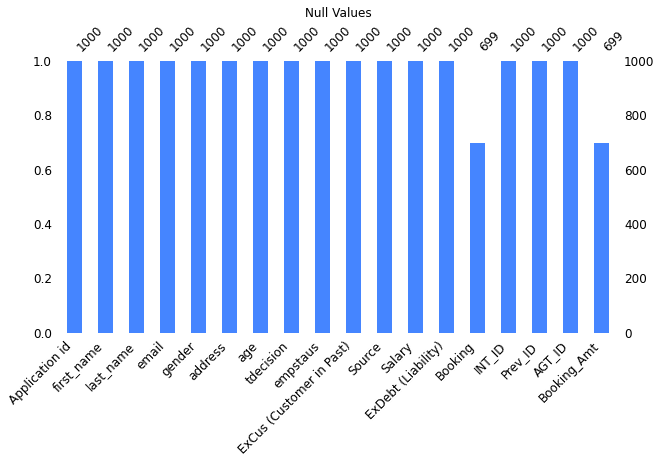

In [5]:
import missingno as no
no.bar(data,figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))
plt.title("Null Values")
plt.show()

In [6]:
data["Booking_Amt"] = data["Booking_Amt"].fillna(data["Booking_Amt"].mean())

# Dropping the duplicate rows

In [7]:
data.dropna(axis=1,inplace=True)

In [8]:
data

,Application id,first_name,last_name,email,gender,address,age,tdecision,empstaus,ExCus (Customer in Past),Source,Salary,ExDebt (Liability),INT_ID,Prev_ID,AGT_ID,Booking_Amt
0,1,Dollie,Scafe,dscafe0@is.gd,Female,02 Garrison Pass,34,Pending,SE,Y,EC,127110,25130,6869736235,79-489-1539,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,363096.037339
1,2,Austin,Pennycook,apennycook1@mac.com,Male,007 Miller Road,57,Approve,SE,Y,D,464039,22311,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,278423.400000
2,3,Mareah,Tomanek,mtomanek2@bloomberg.com,Female,145 Charing Cross Junction,57,Approve,SE,Y,3P,584420,28557,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,350652.000000
3,4,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,Female,268 Algoma Hill,59,Approve,SE,Y,3P,583781,26042,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,350268.600000
4,5,Danyette,Stempe,dstempe4@tumblr.com,Female,571 Stone Corner Park,51,Approve,SE,N,MP,551718,27892,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,331030.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Alvira,Gaylor,agaylorrn@webeden.co.uk,Female,4129 Colorado Circle,28,Pending,NSE,Y,EC,120892,26779,3110437589,22-757-4979,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...,363096.037339
996,997,Frankie,O'Grada,fogradaro@bbc.co.uk,Female,69 Jackson Drive,55,Approve,SE,N,EC,477692,27746,4377519379,95-833-5368,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_4)...,429922.800000
997,998,Rossy,Bygott,rbygottrp@networksolutions.com,Male,9 Knutson Avenue,42,Pending,SE,N,EC,33380,29547,1872897886,58-174-0323,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,363096.037339
998,999,Frederique,Blundin,fblundinrq@buzzfeed.com,Female,3 Service Trail,35,Pending,SE,Y,EC,101142,23359,442599560,03-221-6322,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,363096.037339


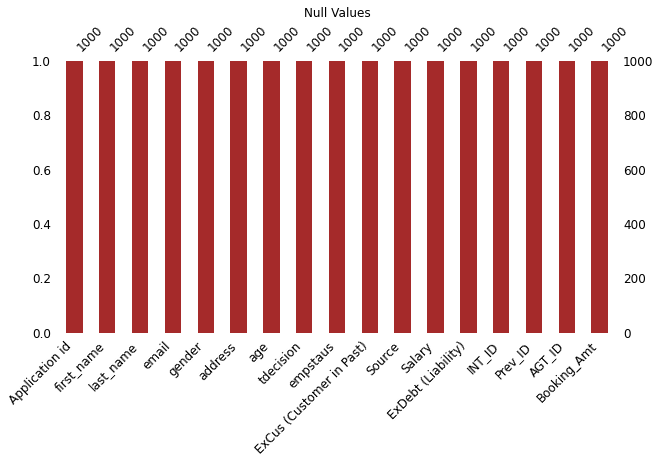

In [9]:
import missingno as no
no.bar(data,figsize=(10,5), fontsize=12, color='brown')
plt.title("Null Values")
plt.show()

# Full summary of the dataframe

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Application id            1000 non-null   int64  
 1   first_name                1000 non-null   object 
 2   last_name                 1000 non-null   object 
 3   email                     1000 non-null   object 
 4   gender                    1000 non-null   object 
 5   address                   1000 non-null   object 
 6   age                       1000 non-null   int64  
 7   tdecision                 1000 non-null   object 
 8   empstaus                  1000 non-null   object 
 9   ExCus (Customer in Past)  1000 non-null   object 
 10  Source                    1000 non-null   object 
 11  Salary                    1000 non-null   int64  
 12  ExDebt (Liability)        1000 non-null   int64  
 13  INT_ID                    1000 non-null   int64  
 14  Prev_ID  

# Statistical details of the dataset

In [11]:
data.describe()

,Application id,age,Salary,ExDebt (Liability),INT_ID,Booking_Amt
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,500.500000,43.993000,300965.584000,25719.898000,4.991688e+09,363096.037339
std,288.819436,12.199827,174484.016951,2728.736685,2.902731e+09,161239.451274
min,1.000000,20.000000,1473.000000,21002.000000,1.788664e+07,47470.500000
25%,250.750000,33.000000,147630.000000,23461.000000,2.500389e+09,261347.850000
50%,500.500000,47.000000,299657.500000,25782.500000,5.018401e+09,363096.037339
75%,750.250000,55.000000,452421.500000,28073.500000,7.439011e+09,425191.275000
max,1000.000000,60.000000,597399.000000,30453.000000,9.995180e+09,894333.000000


# Shape of dataset

In [12]:
data.shape

(1000, 17)

# Find the dtypes in the Dataset

In [13]:
data.dtypes

Application id                int64
first_name                   object
last_name                    object
email                        object
gender                       object
address                      object
age                           int64
tdecision                    object
empstaus                     object
ExCus (Customer in Past)     object
Source                       object
Salary                        int64
ExDebt (Liability)            int64
INT_ID                        int64
Prev_ID                      object
AGT_ID                       object
Booking_Amt                 float64
dtype: object

# Finding all the column names inside the dataset

In [14]:
data.columns

Index(['Application id', 'first_name', 'last_name', 'email', 'gender',
       'address', 'age', 'tdecision', 'empstaus', 'ExCus (Customer in Past)',
       'Source', 'Salary', 'ExDebt (Liability)', 'INT_ID', 'Prev_ID', 'AGT_ID',
       'Booking_Amt'],
      dtype='object')

# Function return Series with number of distinct observations over requested axis

In [15]:
data.nunique()

Application id              1000
first_name                   936
last_name                    987
email                       1000
gender                         2
address                     1000
age                           41
tdecision                      3
empstaus                       2
ExCus (Customer in Past)       2
Source                         4
Salary                       999
ExDebt (Liability)           952
INT_ID                      1000
Prev_ID                     1000
AGT_ID                       432
Booking_Amt                  700
dtype: int64

# Find the correlation of dataset

In [16]:
data.corr()

,Application id,age,Salary,ExDebt (Liability),INT_ID,Booking_Amt
Application id,1.000000,0.034766,0.033275,0.027010,0.006395,-0.004664
age,0.034766,1.000000,0.431881,-0.028532,-0.018156,0.253229
Salary,0.033275,0.431881,1.000000,0.007630,0.006605,0.360345
ExDebt (Liability),0.027010,-0.028532,0.007630,1.000000,-0.016449,0.030718
INT_ID,0.006395,-0.018156,0.006605,-0.016449,1.000000,0.010618
Booking_Amt,-0.004664,0.253229,0.360345,0.030718,0.010618,1.000000


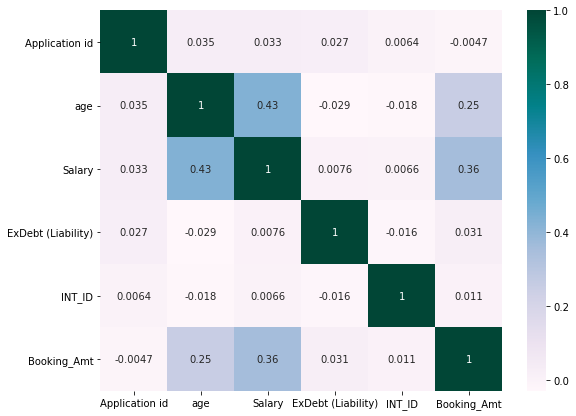

In [17]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True,cmap='PuBuGn')
plt.show()

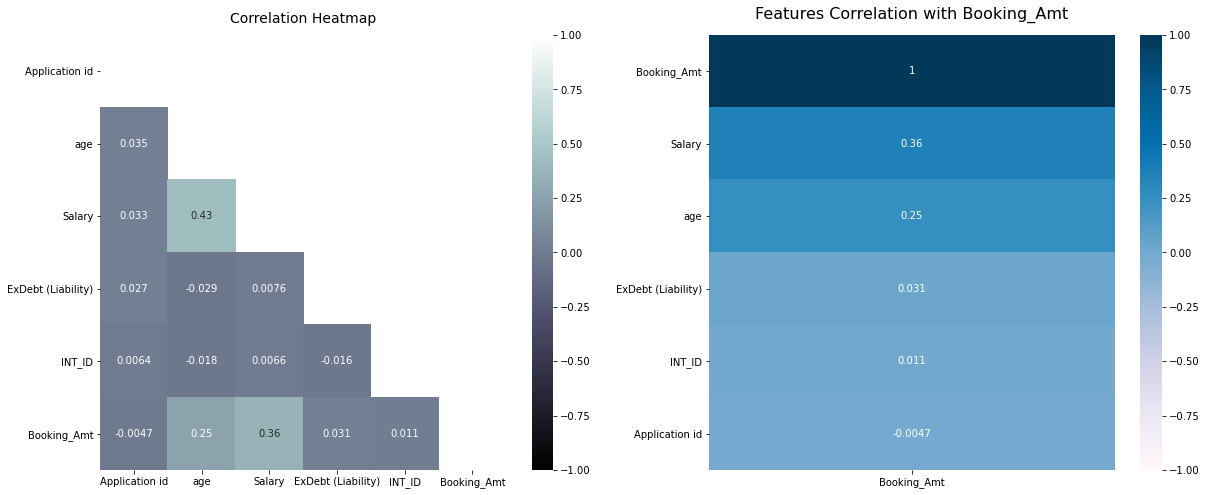

In [18]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = data.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='bone')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Booking_Amt']].sort_values(by='Booking_Amt',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='PuBu')
heatmap.set_title('Features Correlation with Booking_Amt', fontdict={'fontsize':16}, pad=16);

# Find the covariance of dataset

In [19]:
data.cov()

,Application id,age,Salary,ExDebt (Liability),INT_ID,Booking_Amt
Application id,8.341667e+04,1.225000e+02,1.676881e+06,2.128728e+04,5.361176e+09,-2.171808e+05
age,1.225000e+02,1.488358e+02,9.193338e+05,-9.498285e+02,-6.429709e+08,4.981253e+05
Salary,1.676881e+06,9.193338e+05,3.044467e+10,3.632677e+06,3.345276e+12,1.013784e+10
ExDebt (Liability),2.128728e+04,-9.498285e+02,3.632677e+06,7.446004e+06,-1.302929e+11,1.351513e+07
INT_ID,5.361176e+09,-6.429709e+08,3.345276e+12,-1.302929e+11,8.425850e+18,4.969487e+12
Booking_Amt,-2.171808e+05,4.981253e+05,1.013784e+10,1.351513e+07,4.969487e+12,2.599816e+10


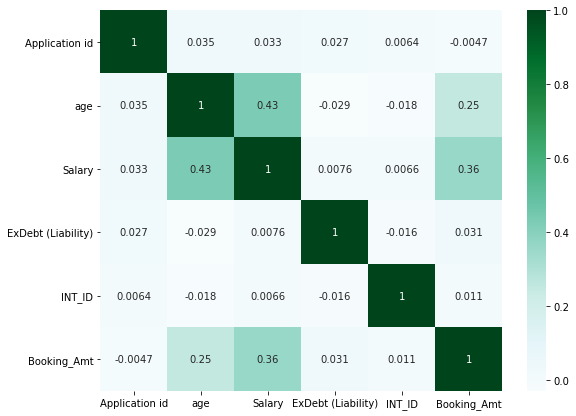

In [20]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True,cmap='BuGn')
plt.show()

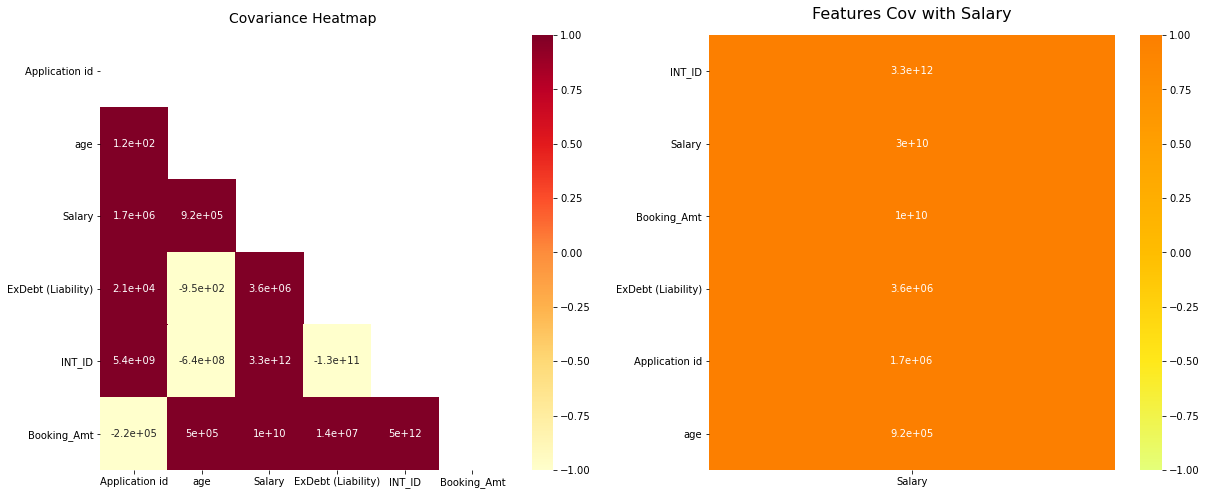

In [21]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_cov = data.cov()
mask = np.triu(np.ones_like(resign_cov, dtype=np.bool))
cat_heatmap = sns.heatmap(data.cov(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='YlOrRd')
cat_heatmap.set_title('Covariance Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_cov[['Salary']].sort_values(by='Salary',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Wistia')
heatmap.set_title('Features Cov with Salary', fontdict={'fontsize':16}, pad=16);

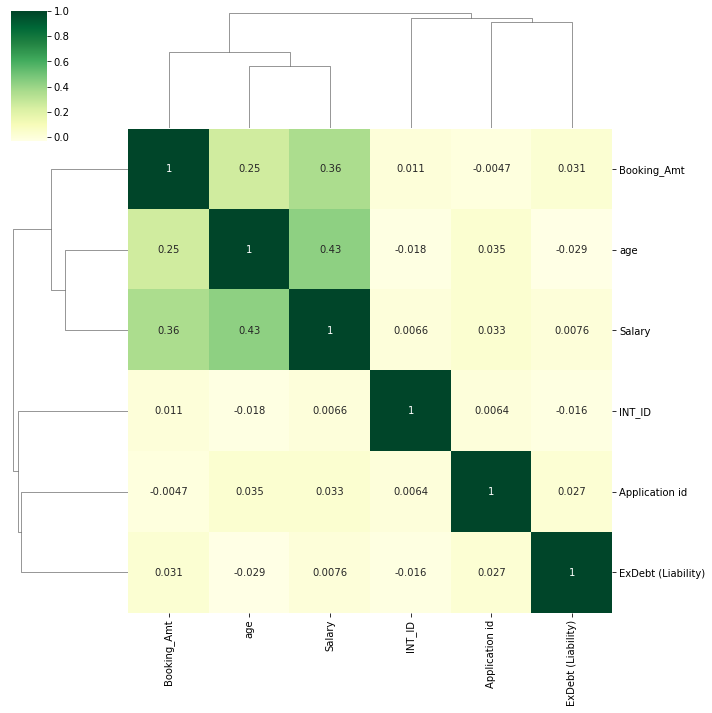

In [22]:
sns.clustermap(data.corr(),annot=True,cmap='YlGn')

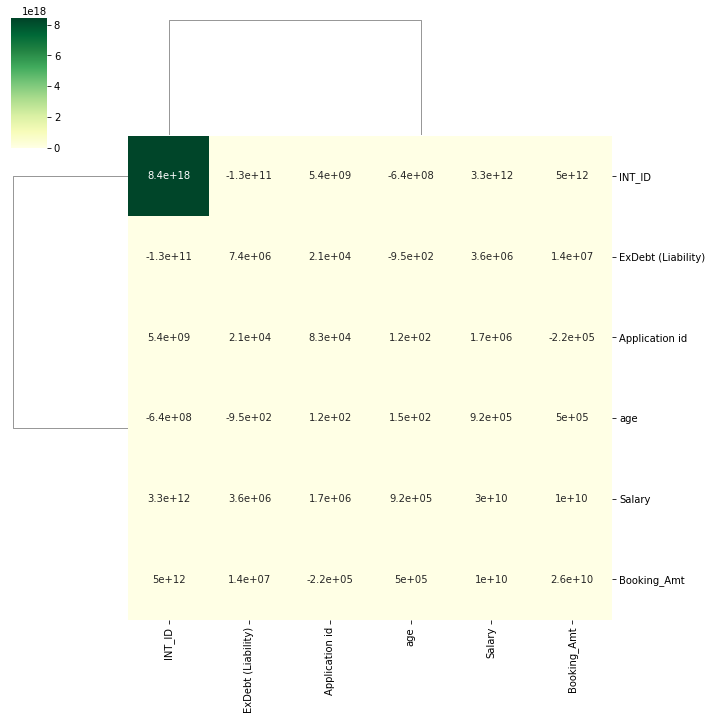

In [23]:
sns.clustermap(data.cov(),annot=True,cmap='YlGn')

# Bar Plot

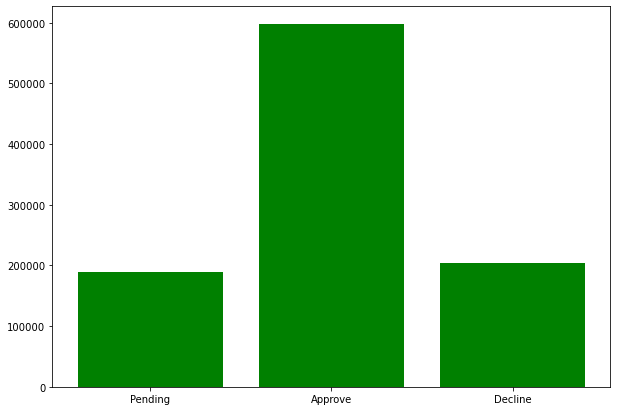

In [24]:
plt.figure(figsize=(10,7))
plt.bar('tdecision','Salary', data=data,color='green')
plt.show()

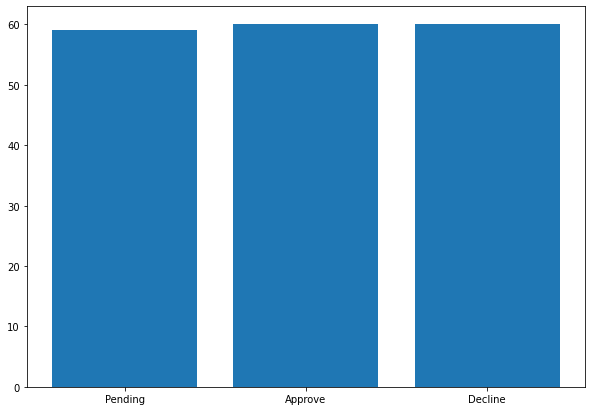

In [25]:
plt.figure(figsize=(10,7))
plt.bar('tdecision','age', data=data)
plt.show()

# Count plot

Approve    699
Decline    213
Pending     88
Name: tdecision, dtype: int64


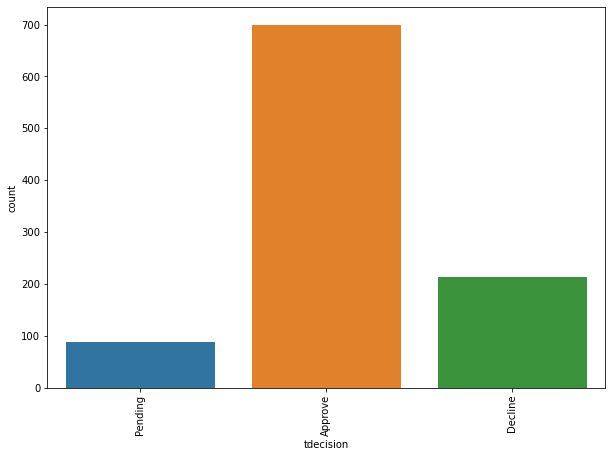

In [26]:
print(data['tdecision'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(x=data['tdecision'])
plt.xticks(rotation=90)
plt.show()

Female    526
Male      474
Name: gender, dtype: int64


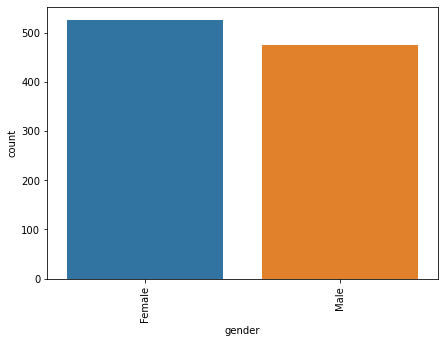

In [27]:
print(data['gender'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x=data['gender'])
plt.xticks(rotation=90)
plt.show()

SE     506
NSE    494
Name: empstaus, dtype: int64


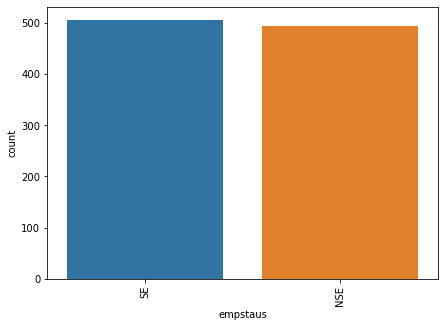

In [28]:
print(data['empstaus'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x=data['empstaus'])
plt.xticks(rotation=90)
plt.show()

# Histogram

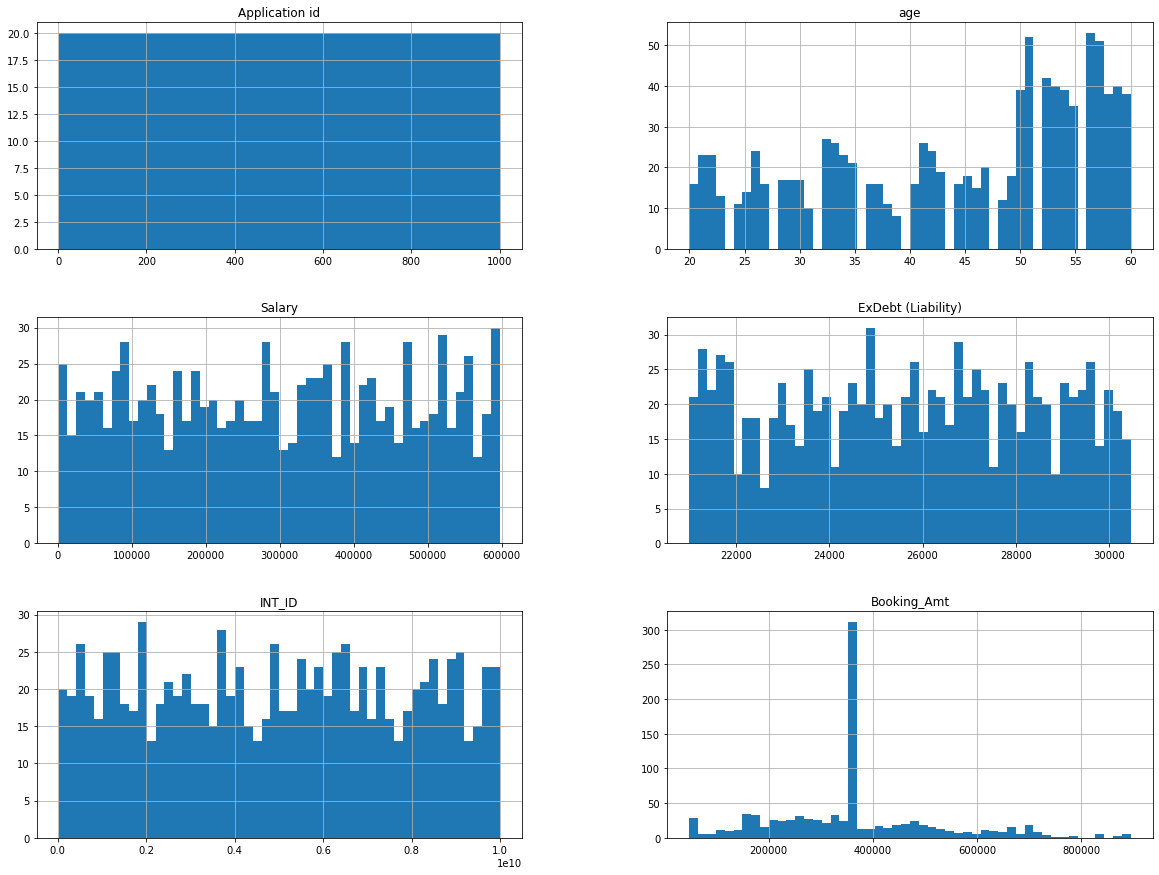

In [29]:
data.hist(bins=50 ,figsize=(20,15))
plt.show()

# Distribution Plot

count    1000.000000
mean       43.993000
std        12.199827
min        20.000000
25%        33.000000
50%        47.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64


<AxesSubplot:ylabel='Density'>

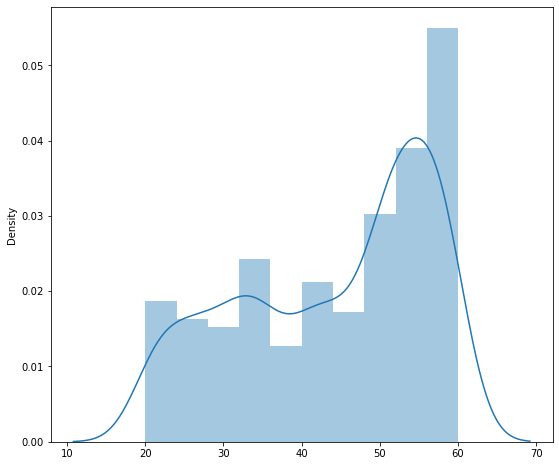

In [30]:
print(data['age'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(x = data['age'], bins = 10)

count      1000.000000
mean     363096.037339
std      161239.451274
min       47470.500000
25%      261347.850000
50%      363096.037339
75%      425191.275000
max      894333.000000
Name: Booking_Amt, dtype: float64


<AxesSubplot:ylabel='Density'>

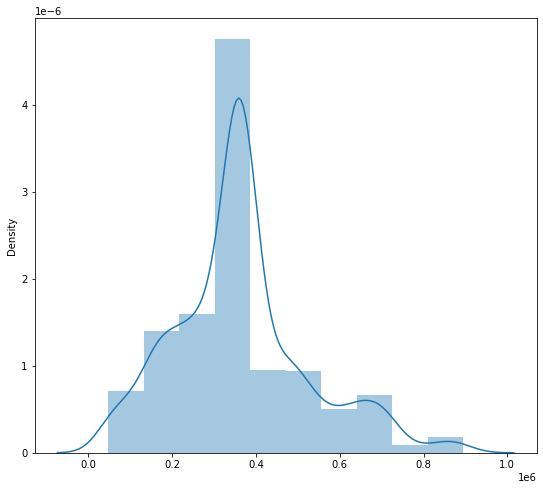

In [31]:
print(data['Booking_Amt'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(x = data['Booking_Amt'], bins = 10)

# Scatter Plot

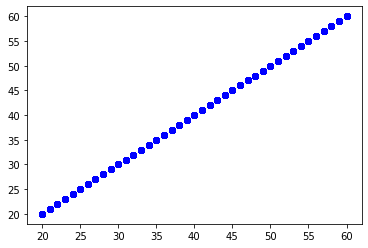

In [207]:
x =data["age"] 
y =data["age"]
plt.scatter(x, y, c ="blue")
# To show the plot
plt.show()

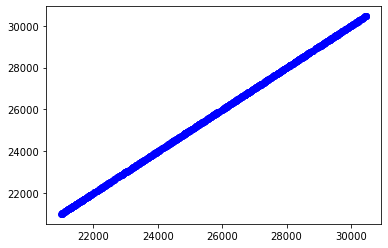

In [206]:
x =data["ExDebt (Liability)"] 
y =data["ExDebt (Liability)"]
plt.scatter(x, y, c ="blue")
# To show the plot
plt.show()

# Stripplot

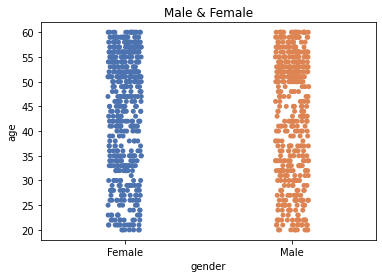

In [32]:
sns.stripplot(data=data, y='age',x='gender', palette='deep')
plt.title("Male & Female")
plt.show()

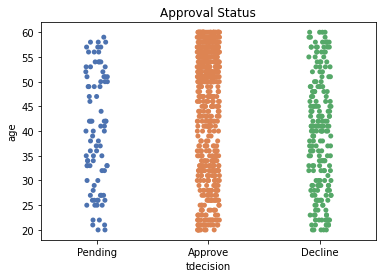

In [33]:
sns.stripplot(data=data, y='age',x='tdecision', palette='deep')
plt.title("Approval Status")
plt.show()

# Pie Chart

In [34]:
label = data['tdecision'].unique()
label

array(['Pending', 'Approve', 'Decline'], dtype=object)

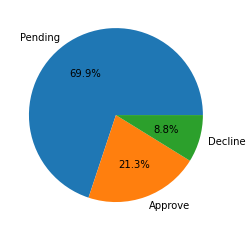

In [35]:
plt.pie(x=data['tdecision'].value_counts(),labels = label,rotatelabels=False,autopct='%1.1f%%',radius=1)
plt.show()

In [36]:
data['gender'].value_counts()

Female    526
Male      474
Name: gender, dtype: int64

In [37]:
explode = (0, 0.1)

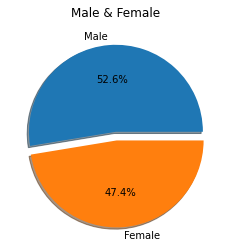

In [38]:
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Male & Female')
plt.show()

# Boxplot

<AxesSubplot:xlabel='gender', ylabel='age'>

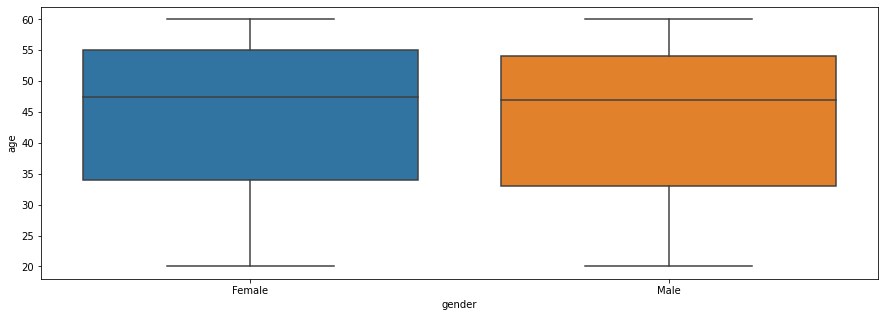

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x='gender',y='age',data=data)

<AxesSubplot:xlabel='tdecision', ylabel='age'>

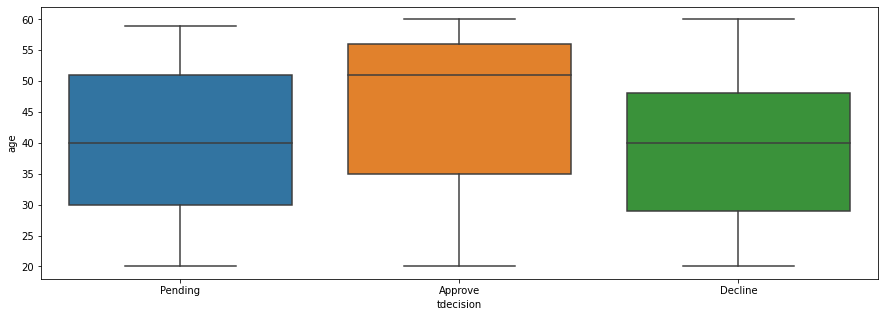

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x='tdecision',y='age',data=data)

# Find the Series containing counts of unique values

In [41]:
data.value_counts()

Application id  first_name       last_name     email                         gender  address                  age  tdecision  empstaus  ExCus (Customer in Past)  Source  Salary  ExDebt (Liability)  INT_ID      Prev_ID      AGT_ID                                                                                                                               Booking_Amt  
1               Dollie           Scafe         dscafe0@is.gd                 Female  02 Garrison Pass         34   Pending    SE        Y                         EC      127110  25130               6869736235  79-489-1539  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; en-US) AppleWebKit/534.17 (KHTML, like Gecko) Chrome/11.0.655.0 Safari/534.17      363096.037339    1
672             Morrie           Reuter        mreuterin@ted.com             Male    37561 Vahlen Hill        54   Pending    NSE       Y                         EC      64550   25554               7316362758  31-029-1136  Mozilla/5.0 (X11; Ubuntu; Linux 

In [42]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Application id,1000.0,5.005000e+02,2.888194e+02,1.0,2.507500e+02,5.005000e+02,7.502500e+02,1.000000e+03
age,1000.0,4.399300e+01,1.219983e+01,20.0,3.300000e+01,4.700000e+01,5.500000e+01,6.000000e+01
Salary,1000.0,3.009656e+05,1.744840e+05,1473.0,1.476300e+05,2.996575e+05,4.524215e+05,5.973990e+05
ExDebt (Liability),1000.0,2.571990e+04,2.728737e+03,21002.0,2.346100e+04,2.578250e+04,2.807350e+04,3.045300e+04
INT_ID,1000.0,4.991688e+09,2.902731e+09,17886643.0,2.500389e+09,5.018401e+09,7.439011e+09,9.995180e+09
Booking_Amt,1000.0,3.630960e+05,1.612395e+05,47470.5,2.613479e+05,3.630960e+05,4.251913e+05,8.943330e+05


In [43]:
data.ndim

2

In [44]:
data.size

17000

In [45]:
data.min()

Application id                                                            1
first_name                                                            Aaron
last_name                                                            Abbott
email                                                  aaddie2l@comcast.net
gender                                                               Female
address                                                 0 American Ash Lane
age                                                                      20
tdecision                                                           Approve
empstaus                                                                NSE
ExCus (Customer in Past)                                                  N
Source                                                                   3P
Salary                                                                 1473
ExDebt (Liability)                                                    21002
INT_ID      

In [46]:
data.max()

Application id                                                           1000
first_name                                                              Zonda
last_name                                                        des Remedios
email                                                      zpriddisde@nyu.edu
gender                                                                   Male
address                                                        9992 1st Plaza
age                                                                        60
tdecision                                                             Pending
empstaus                                                                   SE
ExCus (Customer in Past)                                                    Y
Source                                                                     MP
Salary                                                                 597399
ExDebt (Liability)                                              

# Extract Derived Features from Data

In [47]:
def drop_column(data,col):
    data.drop(col,axis=1,inplace=True)

In [48]:
drop_column(data,'first_name')

In [49]:
drop_column(data,'last_name')

In [50]:
drop_column(data,'email')

In [51]:
drop_column(data,'AGT_ID')

In [52]:
drop_column(data,'address')

In [53]:
drop_column(data,'INT_ID')

In [54]:
drop_column(data,'Prev_ID')

# Get dummies

    There is no sequenced process or there is a no sequenced relationship that indicates whether a separate 
    categorical variable takes on a specific value. We can create dummy variables in python using 
    get_dummies() method

In [55]:
data["Source"].unique()

array(['EC', 'D', '3P', 'MP'], dtype=object)

In [56]:
source_dummies = pd.get_dummies(data['Source'],drop_first=True) 

In [57]:
source_dummies

,D,EC,MP
0,0,1,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
995,0,1,0
996,0,1,0
997,0,1,0
998,0,1,0


In [58]:
empstaus_dummies = pd.get_dummies(data['empstaus'],drop_first=True) 

In [59]:
empstaus_dummies

,SE
0,1
1,1
2,1
3,1
4,1
...,...
995,0
996,1
997,1
998,1


In [60]:
ExCus_dummies = pd.get_dummies(data['ExCus (Customer in Past)'],drop_first=True) 

In [61]:
ExCus_dummies

,Y
0,1
1,1
2,1
3,1
4,0
...,...
995,1
996,0
997,0
998,1


In [62]:
gender_dummies = pd.get_dummies(data['gender'],drop_first=True)

In [63]:
gender_dummies

,Male
0,0
1,1
2,0
3,0
4,0
...,...
995,0
996,0
997,1
998,0


In [64]:
merge = pd.concat([data,source_dummies,empstaus_dummies,ExCus_dummies,gender_dummies],axis=1)

In [65]:
merge

,Application id,gender,age,tdecision,empstaus,ExCus (Customer in Past),Source,Salary,ExDebt (Liability),Booking_Amt,D,EC,MP,SE,Y,Male
0,1,Female,34,Pending,SE,Y,EC,127110,25130,363096.037339,0,1,0,1,1,0
1,2,Male,57,Approve,SE,Y,D,464039,22311,278423.400000,1,0,0,1,1,1
2,3,Female,57,Approve,SE,Y,3P,584420,28557,350652.000000,0,0,0,1,1,0
3,4,Female,59,Approve,SE,Y,3P,583781,26042,350268.600000,0,0,0,1,1,0
4,5,Female,51,Approve,SE,N,MP,551718,27892,331030.800000,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Female,28,Pending,NSE,Y,EC,120892,26779,363096.037339,0,1,0,0,1,0
996,997,Female,55,Approve,SE,N,EC,477692,27746,429922.800000,0,1,0,1,0,0
997,998,Male,42,Pending,SE,N,EC,33380,29547,363096.037339,0,1,0,1,0,1
998,999,Female,35,Pending,SE,Y,EC,101142,23359,363096.037339,0,1,0,1,1,0


In [66]:
drop_column(merge,'gender')

In [67]:
drop_column(merge,'empstaus')

In [68]:
drop_column(merge,'ExCus (Customer in Past)')

In [69]:
drop_column(merge,'Source')

In [70]:
merge.head()

,Application id,age,tdecision,Salary,ExDebt (Liability),Booking_Amt,D,EC,MP,SE,Y,Male
0,1,34,Pending,127110,25130,363096.037339,0,1,0,1,1,0
1,2,57,Approve,464039,22311,278423.400000,1,0,0,1,1,1
2,3,57,Approve,584420,28557,350652.000000,0,0,0,1,1,0
3,4,59,Approve,583781,26042,350268.600000,0,0,0,1,1,0
4,5,51,Approve,551718,27892,331030.800000,0,0,1,1,0,0


# LabelEncoder

    There is sequenced process or there is a sequenced relationship. it "encode" target labels with value between 0 and n_classes-1. This transformer should be used to encode target values

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
Label_encoder = LabelEncoder()

In [73]:
merge.tdecision = Label_encoder.fit_transform(merge.tdecision)

In [74]:
merge.tdecision.unique()

array([2, 0, 1])

In [195]:
merge.head(7)

,Application id,age,tdecision,Salary,ExDebt (Liability),Booking_Amt,D,EC,MP,SE,Y,Male
0,1,34,2,127110,25130,363096.037339,0,1,0,1,1,0
1,2,57,0,464039,22311,278423.400000,1,0,0,1,1,1
2,3,57,0,584420,28557,350652.000000,0,0,0,1,1,0
3,4,59,0,583781,26042,350268.600000,0,0,0,1,1,0
4,5,51,0,551718,27892,331030.800000,0,0,1,1,0,0
5,6,31,0,209517,29554,62855.100000,1,0,0,1,0,1
6,7,47,0,361538,23057,216922.800000,1,0,0,1,0,1


# Handle Outliers

# Outlier detection and Outlier imputation if availabale in data

In [76]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

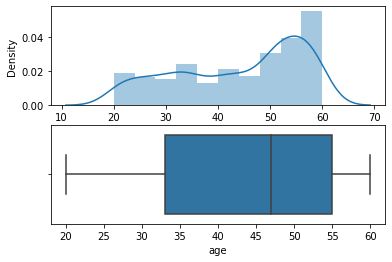

In [77]:
plot(merge,'age')

# Separate out your Independent feature & Dependent feature

In [78]:
x = merge.drop("tdecision",axis=1)

In [79]:
y = merge["tdecision"]

# Select best Features using Feature Selection Technique

    To Find the best features which will be contribute mst and that will be a good relationship the target varibale

In [80]:
from sklearn.feature_selection import mutual_info_classif

In [81]:
mutual_info_classif(x,y) #Independent variable and dependent variable

# Some kind of important and priority with respective your target variable

array([0.        , 0.03136275, 0.55284729, 0.        , 0.60799265,
       0.02517326, 0.1830558 , 0.01523746, 0.01137605, 0.00725076,
       0.02198361])

In [82]:
imp = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)

In [83]:
imp

,0
Application id,0.000000
age,0.035150
Salary,0.552847
ExDebt (Liability),0.000000
Booking_Amt,0.609418
D,0.006962
EC,0.216823
MP,0.023540
SE,0.000000
Y,0.001054


In [84]:
imp.columns=['ímportance']
imp.sort_values('ímportance',ascending=True)

,ímportance
Application id,0.000000
ExDebt (Liability),0.000000
SE,0.000000
Y,0.001054
D,0.006962
Male,0.015121
MP,0.023540
age,0.035150
EC,0.216823
Salary,0.552847


In [85]:
imp.columns=['ímportance']
imp.sort_values('ímportance',ascending=False)

,ímportance
Booking_Amt,0.609418
Salary,0.552847
EC,0.216823
age,0.035150
MP,0.023540
Male,0.015121
D,0.006962
Y,0.001054
Application id,0.000000
ExDebt (Liability),0.000000


# Splitting Dataset into Training and Testing set

In [86]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [87]:
import scikitplot as skplt

# Logistic Regression

    Logistic Regression is a technique applied in ML to classify problems based on the probability concepts. The logistic regression hypothesis limits the cost function between 0 and 1. In logistic regression, the graphs are plotted based on the features or variable used in the dataset. The independent variables are declared in the x-axis and the target or deciding variable is declared in the y-axis. This produces a graph which may be sinusoidal in nature or just a normal linear one

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
model = LogisticRegression()

In [90]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [91]:
y_pred_log = model.predict(xtest)

In [92]:
y_pred_log

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [93]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_log})
df1

,Actual,Predicted
544,1,1
515,0,0
193,0,0
11,0,0
279,1,1
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred_log)

0.93

In [95]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_log)

In [96]:
cm

array([[142,   0,   0],
       [  0,  44,   0],
       [  0,  14,   0]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.76      1.00      0.86        44
           2       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.59      0.67      0.62       200
weighted avg       0.88      0.93      0.90       200



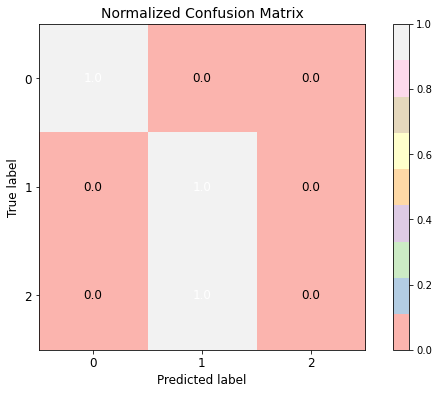

In [97]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_log,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_log))

In [98]:
y_probas_log = model.predict_proba(xtest)
y_probas_log

array([[1.06305912e-183, 6.80397011e-001, 3.19602989e-001],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 2.37649794e-108, 6.10275124e-109],
       [2.10079613e-275, 6.46147570e-001, 3.53852430e-001],
       [3.59658001e-188, 7.31173120e-001, 2.68826880e-001],
       [1.00000000e+000, 5.30857355e-131, 3.93026515e-132],
       [1.00000000e+000, 8.14785967e-094, 1.93768597e-094],
       [1.79467306e-196, 6.56496917e-001, 3.43503083e-001],
       [1.00000000e+000, 1.06243418e-080, 3.01365998e-081],
       [3.44367606e-145, 6.58787692e-001, 3.41212308e-001],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [3.77066976e-093, 7.35029390e-001, 2.64970610e-001],
       [1.00000000e+000, 6.82727467e-156, 2.67064651e-157],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.71882795e-299, 3.76736488e-300],
       [1.00000000e+000, 0.00000000e+000

<AxesSubplot:ylabel='Density'>

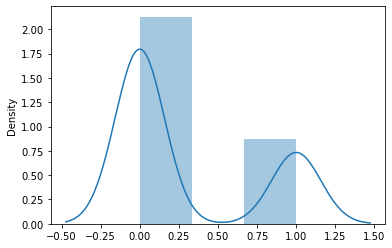

In [99]:
sns.distplot(y_pred_log)

# Support Vector Machine Model

    Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. 

In [100]:
from sklearn.svm import SVC

In [101]:
model_svc = SVC(probability=True)

In [102]:
model_svc.fit(xtrain,ytrain)

SVC(probability=True)

In [103]:
y_pred_svc = model_svc.predict(xtest)
y_pred_svc

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [104]:
model_svc.score(xtest,y_pred_svc)

1.0

In [105]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_svc})
df1

,Actual,Predicted
544,1,1
515,0,0
193,0,0
11,0,0
279,1,1
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred_svc)

0.93

In [107]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_svc)

In [108]:
cm

array([[142,   0,   0],
       [  0,  44,   0],
       [  0,  14,   0]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.76      1.00      0.86        44
           2       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.59      0.67      0.62       200
weighted avg       0.88      0.93      0.90       200



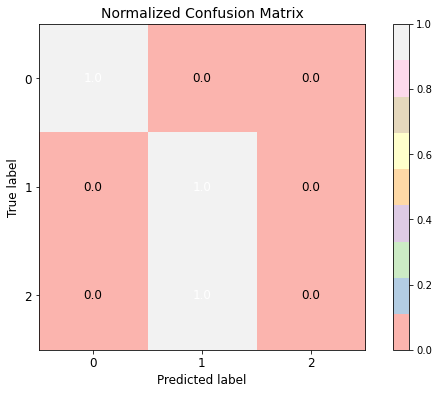

In [109]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_svc,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_svc))

In [110]:
y_probas_svc = model_svc.predict_proba(xtest)
y_probas_svc

array([[5.58459800e-04, 7.44478041e-01, 2.54963500e-01],
       [9.99998287e-01, 7.47081344e-08, 1.63829494e-06],
       [9.99999237e-01, 5.00692055e-08, 7.13016882e-07],
       [9.95597137e-01, 1.59297325e-03, 2.80989004e-03],
       [9.72558859e-05, 6.02439511e-01, 3.97463233e-01],
       [4.87439611e-04, 7.37804152e-01, 2.61708408e-01],
       [9.99100554e-01, 1.94655351e-04, 7.04790949e-04],
       [9.88062916e-01, 5.36269396e-03, 6.57439046e-03],
       [3.77181311e-04, 7.31796315e-01, 2.67826504e-01],
       [9.73983828e-01, 1.39455309e-02, 1.20706411e-02],
       [2.11572906e-03, 7.63518803e-01, 2.34365468e-01],
       [9.99998069e-01, 1.03546127e-07, 1.82743242e-06],
       [1.67599123e-02, 7.46344303e-01, 2.36895785e-01],
       [9.99704699e-01, 2.93650546e-05, 2.65936378e-04],
       [9.99995286e-01, 3.69874463e-07, 4.34436652e-06],
       [9.99989253e-01, 1.03302336e-06, 9.71416255e-06],
       [9.99999395e-01, 5.02059190e-08, 5.54756503e-07],
       [2.17083240e-04, 7.12133

<AxesSubplot:ylabel='Density'>

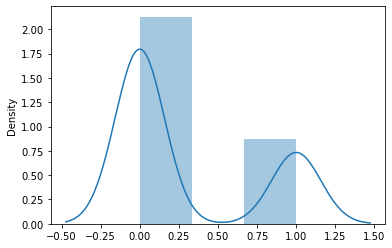

In [111]:
sns.distplot(y_pred_svc)

# K-Nearest Neighbor Algorithm

    K – Nearest Neighbor (KNN) algorithm is a supervised machine learning algorithm which can be easily implemented and also can be used to solve both classification and regression problems. This algorithm assumes that similar things exist in close proximity or in other words near to each other. KNN captures this idea with some mathematics learned by everyone in childhood for calculating the distance between points on a graph. This idea is about similarity which can also be called distance, proximity or closeness. The distance can be calculated in other ways also and depending on the problem to be solved, any one of the ways can be adopted. One of the most known and familiar choices is the calculation of the straight-line distance which is called Euclidean distance

# K Neighbors Classifier

        The k-Nearest-Neighbor Classifier (kNN) works directly on the learned samples, instead of creating rules compared to other classification methods

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knc =KNeighborsClassifier(n_neighbors=2)
knc.fit(xtrain, ytrain)
print('Accuracy:', knc.score(xtest, ytest)*100)

Accuracy: 91.0


In [113]:
y_pred_train_knc = knc.predict(xtrain) 
y_pred_train_knc

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [114]:
y_pred_knc = knc.predict(xtest)

In [115]:
y_pred_knc

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [116]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_knc})
df1

,Actual,Predicted
544,1,1
515,0,0
193,0,0
11,0,0
279,1,1
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


In [117]:
y_probas_knc = knc.predict_proba(xtest)

In [118]:
y_probas_knc

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [1. , 0. 

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_knc)

array([[142,   0,   0],
       [  0,  38,   6],
       [  0,  12,   2]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       0.76      0.86      0.81        44
           2       0.25      0.14      0.18        14

    accuracy                           0.91       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.89      0.91      0.90       200



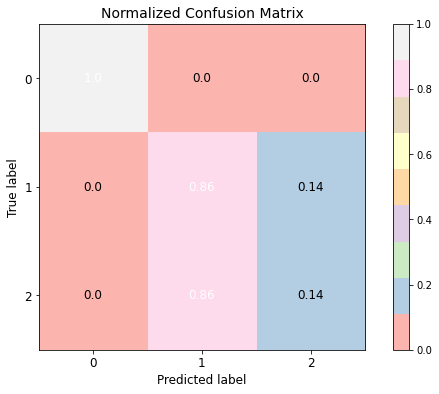

In [120]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_knc,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_knc))

<AxesSubplot:ylabel='Density'>

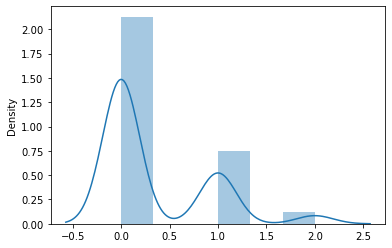

In [121]:
sns.distplot(y_pred_knc)

# DecisionTreeClassifier

    Decision Tree algorithm is an algorithm in supervised learning. This algorithm can be used for solving both classification and regression problems unlike other supervised learning algorithms. The main aim of this tree is that it can create training models which will then be used to predict class or value of target variables by learning decision rules inferred from training data. The understanding level of this algorithm is so easy compared to other classification algorithms. Using tree representation, this algorithm tries to solve the problem. The tree contains internal nodes which correspond to an attribute and leaf nodes which correspond to a class label. So, for predicting a class label for a record, the process starts from the root of the tree, then the values of the root attribute are compared with the values of the record’s attribute and finally on the basis of comparison, the branch corresponding to that value is followed and then jumped to the next node

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
clf = DecisionTreeClassifier()

In [124]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [125]:
y_pred_dec = clf.predict(xtest)

In [126]:
y_pred_dec

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [127]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_dec})
df1

,Actual,Predicted
544,1,1
515,0,0
193,0,0
11,0,0
279,1,1
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


In [128]:
y_probas_dec = clf.predict_proba(xtest)

In [129]:
y_probas_dec

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_dec)

array([[142,   0,   0],
       [  1,  43,   0],
       [  0,   0,  14]], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       1.00      0.98      0.99        44
           2       1.00      1.00      1.00        14

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



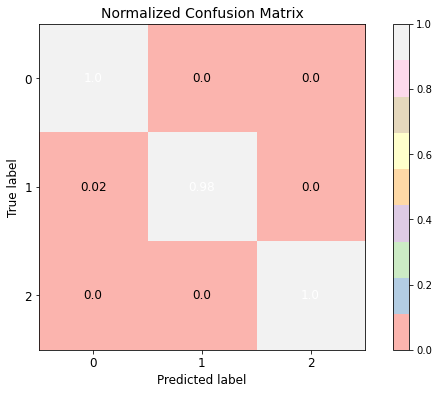

In [131]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_dec,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_dec))

In [132]:
print("Accuracy = ",accuracy_score(ytest,y_pred_dec))

Accuracy =  0.995


<AxesSubplot:ylabel='Density'>

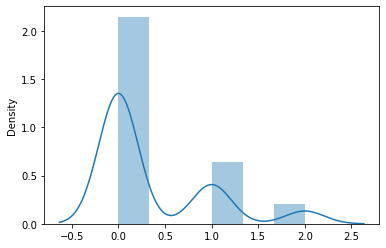

In [133]:
sns.distplot(y_pred_dec)

[Text(2195.833333333333, 4077.0, 'X[2] <= 184732.5\ngini = 0.462\nsamples = 800\nvalue = [557, 169, 74]'),
 Text(1033.3333333333333, 3171.0, 'X[6] <= 0.5\ngini = 0.478\nsamples = 249\nvalue = [12, 164, 73]'),
 Text(516.6666666666666, 2265.0, 'X[4] <= 291842.414\ngini = 0.118\nsamples = 175\nvalue = [11, 164, 0]'),
 Text(258.3333333333333, 1359.0, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0]'),
 Text(775.0, 1359.0, 'gini = 0.0\nsamples = 164\nvalue = [0, 164, 0]'),
 Text(1550.0, 2265.0, 'X[4] <= 261894.164\ngini = 0.027\nsamples = 74\nvalue = [1, 0, 73]'),
 Text(1291.6666666666665, 1359.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(1808.3333333333333, 1359.0, 'gini = 0.0\nsamples = 73\nvalue = [0, 0, 73]'),
 Text(3358.333333333333, 3171.0, 'X[2] <= 193040.5\ngini = 0.022\nsamples = 551\nvalue = [545, 5, 1]'),
 Text(2583.333333333333, 2265.0, 'X[4] <= 293645.414\ngini = 0.5\nsamples = 14\nvalue = [9, 4, 1]'),
 Text(2325.0, 1359.0, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0]'),

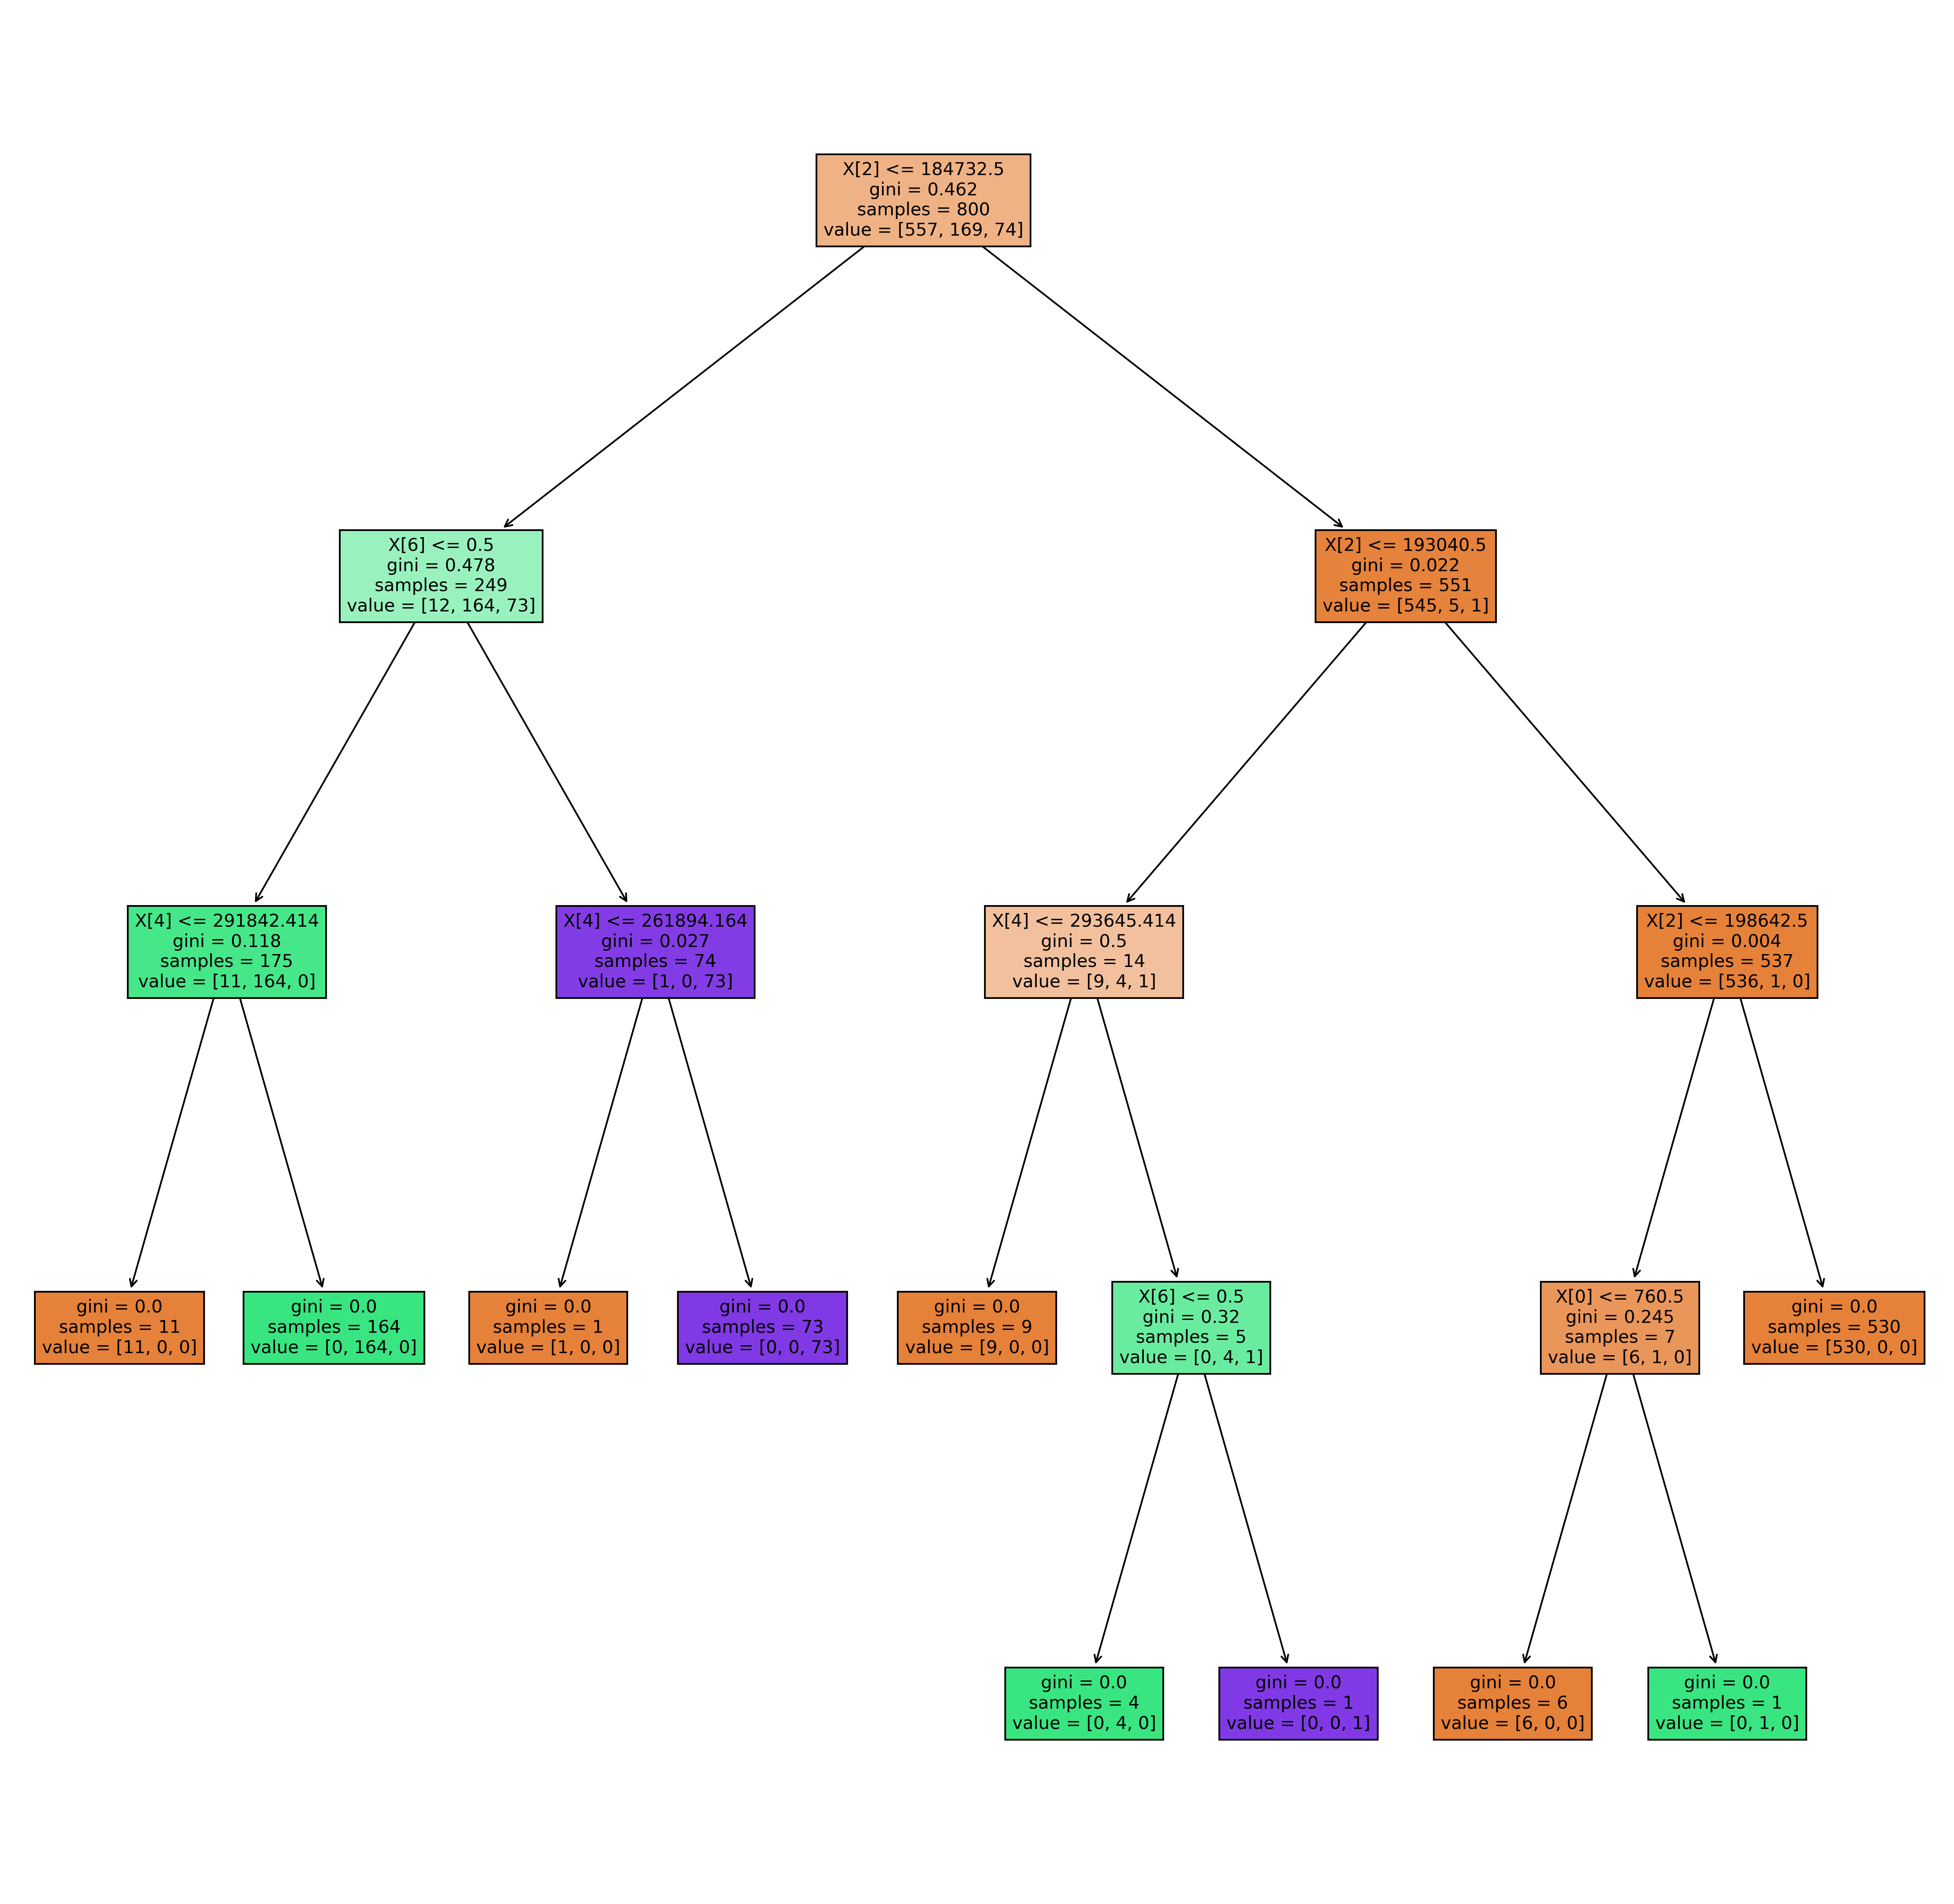

In [134]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(clf,filled=True)

In [135]:
text_represent = tree.export_text(clf)
text_represent

'|--- feature_2 <= 184732.50\n|   |--- feature_6 <= 0.50\n|   |   |--- feature_4 <= 291842.41\n|   |   |   |--- class: 0\n|   |   |--- feature_4 >  291842.41\n|   |   |   |--- class: 1\n|   |--- feature_6 >  0.50\n|   |   |--- feature_4 <= 261894.16\n|   |   |   |--- class: 0\n|   |   |--- feature_4 >  261894.16\n|   |   |   |--- class: 2\n|--- feature_2 >  184732.50\n|   |--- feature_2 <= 193040.50\n|   |   |--- feature_4 <= 293645.41\n|   |   |   |--- class: 0\n|   |   |--- feature_4 >  293645.41\n|   |   |   |--- feature_6 <= 0.50\n|   |   |   |   |--- class: 1\n|   |   |   |--- feature_6 >  0.50\n|   |   |   |   |--- class: 2\n|   |--- feature_2 >  193040.50\n|   |   |--- feature_2 <= 198642.50\n|   |   |   |--- feature_0 <= 760.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- feature_0 >  760.50\n|   |   |   |   |--- class: 1\n|   |   |--- feature_2 >  198642.50\n|   |   |   |--- class: 0\n'

In [136]:
plt.savefig('trees.png',format='png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

# Random Forest Classifier

    Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [137]:
from sklearn.ensemble import RandomForestClassifier
model_Rand = RandomForestClassifier()
model_Rand.fit(xtrain, ytrain)

RandomForestClassifier()

In [138]:
y_pred_rand = model_Rand.predict(xtest)

In [139]:
y_pred_rand

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [140]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_rand})
df1

,Actual,Predicted
544,1,1
515,0,0
193,0,0
11,0,0
279,1,1
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


In [141]:
y_probas_rand = model_Rand.predict_proba(xtest)

In [142]:
y_probas_rand

array([[0.02, 0.97, 0.01],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.02, 0.98, 0.  ],
       [0.01, 0.97, 0.02],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [0.  , 0.99, 0.01],
       [0.98, 0.02, 0.  ],
       [0.01, 0.99, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.99, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.99, 0.  , 0.01],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.96, 0.03],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.9 , 0.08, 0.02],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.02, 0.04, 0.94],
       [0.99, 0.  , 0.01],
       [1.  , 0.  , 0.  ],
       [0.98, 0.  , 0.02],
       [0.  , 0.06, 0.94],
 

In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_rand)

array([[142,   0,   0],
       [  0,  44,   0],
       [  0,   0,  14]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        14

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



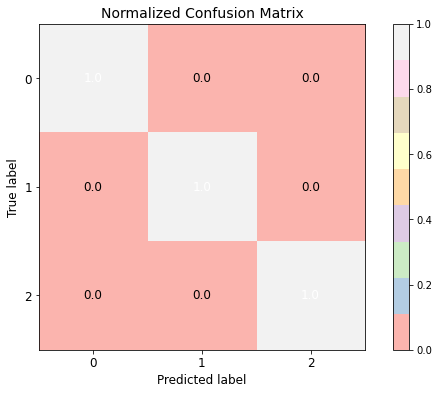

In [144]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_rand,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_rand))

In [145]:
print("Accuracy = ",accuracy_score(ytest,y_pred_rand))

Accuracy =  1.0


<AxesSubplot:ylabel='Density'>

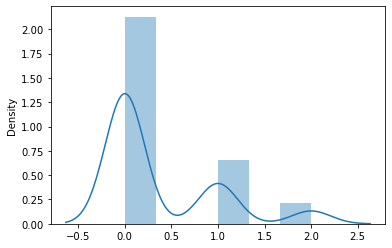

In [146]:
sns.distplot(y_pred_rand)

# XGBClassifier

    XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [147]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(), x, y)

[08:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([1.   , 1.   , 0.995, 0.99 , 0.995])

In [148]:
model_XGB = XGBClassifier()
model_XGB.fit(xtrain, ytrain)

[08:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
y_pred_XGB = model_XGB.predict(xtest)

In [150]:
y_pred_XGB

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [151]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_XGB})
df1

,Actual,Predicted
544,1,1
515,0,0
193,0,0
11,0,0
279,1,1
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


In [152]:
y_probas_XGB = model_XGB.predict_proba(xtest)

In [153]:
y_probas_XGB 

array([[5.03278803e-04, 9.98673201e-01, 8.23512557e-04],
       [9.99565899e-01, 2.09320351e-04, 2.24743213e-04],
       [9.99540806e-01, 2.34526888e-04, 2.24737567e-04],
       [9.99300838e-01, 3.68092995e-04, 3.31080926e-04],
       [1.39265810e-03, 9.97450173e-01, 1.15713303e-03],
       [1.21402729e-03, 9.97777283e-01, 1.00871199e-03],
       [9.99604046e-01, 1.91617699e-04, 2.04333832e-04],
       [9.99480665e-01, 2.68057600e-04, 2.51342222e-04],
       [1.09022600e-03, 9.98003900e-01, 9.05847875e-04],
       [9.99664068e-01, 1.45333775e-04, 1.90648876e-04],
       [5.04331547e-04, 9.98670459e-01, 8.25235154e-04],
       [9.99747097e-01, 1.14248316e-04, 1.38688119e-04],
       [4.76157351e-04, 9.98744726e-01, 7.79133872e-04],
       [9.99525547e-01, 2.50264711e-04, 2.24249859e-04],
       [9.99742687e-01, 1.18631375e-04, 1.38687508e-04],
       [9.99565780e-01, 2.30649064e-04, 2.03569216e-04],
       [9.99747097e-01, 1.14248316e-04, 1.38688119e-04],
       [4.76157351e-04, 9.98744

In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_XGB)

array([[141,   0,   1],
       [  1,  43,   0],
       [  1,   0,  13]], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       1.00      0.98      0.99        44
           2       0.93      0.93      0.93        14

    accuracy                           0.98       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.99      0.98      0.98       200



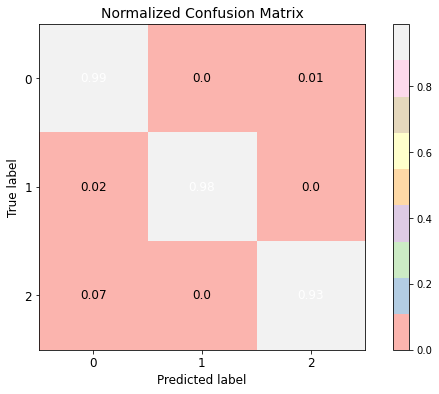

In [155]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_XGB,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_XGB))

In [156]:
print("Accuracy = ",accuracy_score(ytest,y_pred_XGB))

Accuracy =  0.985


<AxesSubplot:ylabel='Density'>

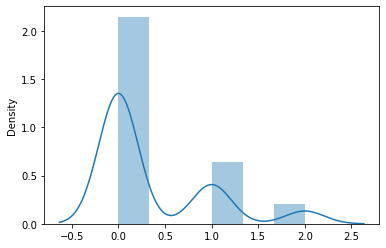

In [157]:
sns.distplot(y_pred_XGB)

# GradientBoostingClassifier

    Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
GR = GradientBoostingClassifier().fit(x, y)

In [159]:
y_pred_GR = GR.predict(xtest)
y_pred_GR

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [160]:
df_GR = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_GR})
df_GR

,Actual,Predicted
544,1,1
515,0,0
193,0,0
11,0,0
279,1,1
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


Accuracy Score

In [161]:
print("Accuracy Score :",accuracy_score(ytest,y_pred_GR))

Accuracy Score : 1.0


Confusion Matrix

In [162]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_GR)
cm

array([[142,   0,   0],
       [  0,  44,   0],
       [  0,   0,  14]], dtype=int64)

In [163]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GR, x, y, cv=5)
scores.mean()

0.9950000000000001

# Naive Bayes Classifier

    Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other

In [164]:
from sklearn.naive_bayes import MultinomialNB

In [165]:
nomial = MultinomialNB().fit(xtrain,ytrain)

In [166]:
y_pred_nomial = nomial.predict(xtest)

In [167]:
y_pred_nomial

array([2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [168]:
df = pd.DataFrame({'Actual':ytest,'Predict':y_pred_nomial})

In [169]:
df

,Actual,Predict
544,1,2
515,0,0
193,0,0
11,0,0
279,1,2
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


Accuracy score

In [170]:
print("Training Data Set Accuracy: ", accuracy_score(ytest,y_pred_nomial))

Training Data Set Accuracy:  0.875


Confusion matrix

In [171]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred_nomial)

In [172]:
cm

array([[142,   0,   0],
       [  1,  23,  20],
       [  0,   4,  10]], dtype=int64)

# Gaussian Naive Bayes Calssifier

In [173]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score

In [174]:
from sklearn.naive_bayes import GaussianNB

In [175]:
gnb_clf=GaussianNB()
gnb_clf.fit(xtrain, ytrain)

GaussianNB()

In [176]:
y_pred_Gaussian = gnb_clf.predict(xtest)
y_pred_Gaussian

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [177]:
df1 = pd.DataFrame({'Actual':ytest,'Predict':y_pred_Gaussian})

In [178]:
df1

,Actual,Predict
544,1,1
515,0,0
193,0,0
11,0,0
279,1,1
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


Accuracy score

In [179]:
print("Accuracy Score :",accuracy_score(ytest,y_pred_Gaussian))

Accuracy Score : 0.93


Confusion matrix

In [180]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred_Gaussian)
cm

array([[142,   0,   0],
       [  0,  44,   0],
       [  0,  14,   0]], dtype=int64)

# BaggingClassifier

In [181]:
from sklearn.ensemble import BaggingClassifier

In [182]:
model_bag = BaggingClassifier()

In [183]:
model_bag.fit(xtrain,ytrain)

BaggingClassifier()

In [184]:
y_pred_bag = model_bag.predict(xtest)

In [185]:
y_pred_bag

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [202]:
df1_bag = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_bag})
df1_bag

,Actual,Predicted
544,1,1
515,0,0
193,0,0
11,0,0
279,1,1
...,...,...
860,0,0
379,0,0
896,0,0
809,0,0


Accuracy score

In [194]:
from sklearn.metrics import accuracy_score
print("Accuracy Score :", accuracy_score(ytest,y_pred_bag))

Accuracy Score : 0.99


Confusion_matrix

In [188]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_bag)
cm

array([[142,   0,   0],
       [  1,  43,   0],
       [  0,   1,  13]], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       0.98      0.98      0.98        44
           2       1.00      0.93      0.96        14

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200



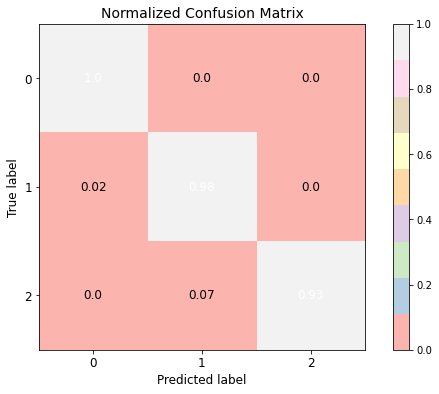

In [189]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_bag,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_bag))

In [190]:
y_probas_bag = model_bag.predict_proba(xtest)
y_probas_bag

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. 

<AxesSubplot:ylabel='Density'>

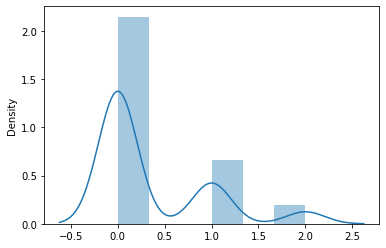

In [191]:
sns.distplot(y_pred_bag)

So, The Highest Accuracy found in "DecisionTreeClassifier" and "BaggingClassifier".

both models have 99% of accuracy.


# TO CHECK THE TDECISION WHETHER YES OR NO

In [200]:
x = [[1,34,127110,25130,363096.037339,0,1,0,1,1,0]]
y_pred_bag = model_bag.predict(xtest) 
if (y_pred_bag[0]==1):
    print("YES")
else:
    print("NO")

YES


In [201]:
x = [[1,34,127110,25130,363096.037339,0,1,0,1,1,0]]
y_pred_bag = model_bag.predict(xtest) 
if (y_pred_bag[0]==0):
    print("YES")
else:
    print("NO")

NO


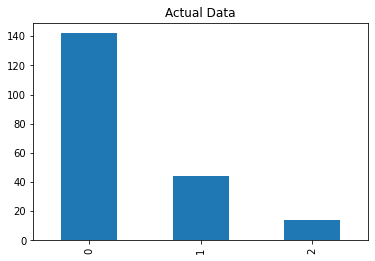

In [203]:
x=df1_bag['Actual'].value_counts()
x.plot.bar()
plt.title('Actual Data')
plt.show()

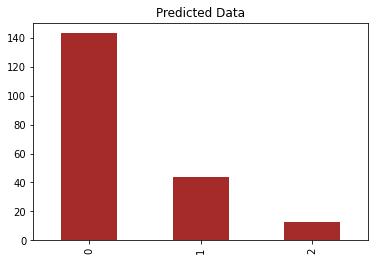

In [204]:
x=df1_bag['Predicted'].value_counts()
x.plot.bar(color='brown')
plt.title('Predicted Data')
plt.show()